In [1]:
#Population models for Syria

%matplotlib inline

from modsim import *

In [2]:
from pandas import read_csv


In [3]:
import csv
#myfile = open('C:/Users/epan/Desktop/popdata.csv')   # Windows
#mycsv = myfile.read()

filename = 'C:/Users/dberny/Desktop/popdata1.csv'
tables = read_csv(filename, header = 1, index_col=0, usecols=[0, 226], skiprows=[2,3])
#tables = read_csv(filename, header=1, index_col=1, nrows=1, skiprows=226)

In [4]:
tables

,Population
Year,
1960,4573512
1961,4721896
1962,4875422
1963,5034646
1964,5200336
1965,5373137
1966,5553246
1967,5740710
1968,5935860


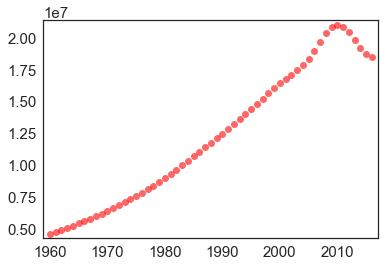

In [5]:
plot(tables, 'ro', label = 'Population of Syria')

In [6]:
birth_filename = 'C:/Users/dberny/Desktop/birthrates1.csv'
birth_table = read_csv(birth_filename, header = 1, index_col=0, usecols=[0, 226], skiprows=[2,3])
birthrate = birth_table.SYR/1000
birth_table


,SYR
Country Code,
1960,48.441
1961,48.087
1962,47.729
1963,47.374
1964,47.034
1965,46.729
1966,46.482
1967,46.303
1968,46.192


In [7]:
#birth_table

In [8]:
death_filename = 'C:/Users/dberny/Desktop/deathrates1.csv'
death_table = read_csv(death_filename, header = 1, index_col=0, usecols=[0, 226], skiprows=[2,3])
deathrate = death_table.SYR/1000
death_table


,SYR
Country Code,
1960,16.102
1961,15.583
1962,15.063
1963,14.543
1964,14.025
1965,13.509
1966,12.994
1967,12.481
1968,11.970


In [9]:
#death_table


In [10]:
system = System(t0=1960, t_end=2015, p0=4573512, birthrate = birthrate, deathrate = deathrate)
def run_simulation(system):
    model = TimeSeries()
    model[1960]=4573512
    for t in range(system.t0, system.t_end):
        rate_birth = system.birthrate[t]
        births = model[t]*rate_birth
        deaths = model[t]*system.deathrate[t]
        model[t+1] = model[t] + births - deaths
    system.model = model
    return model


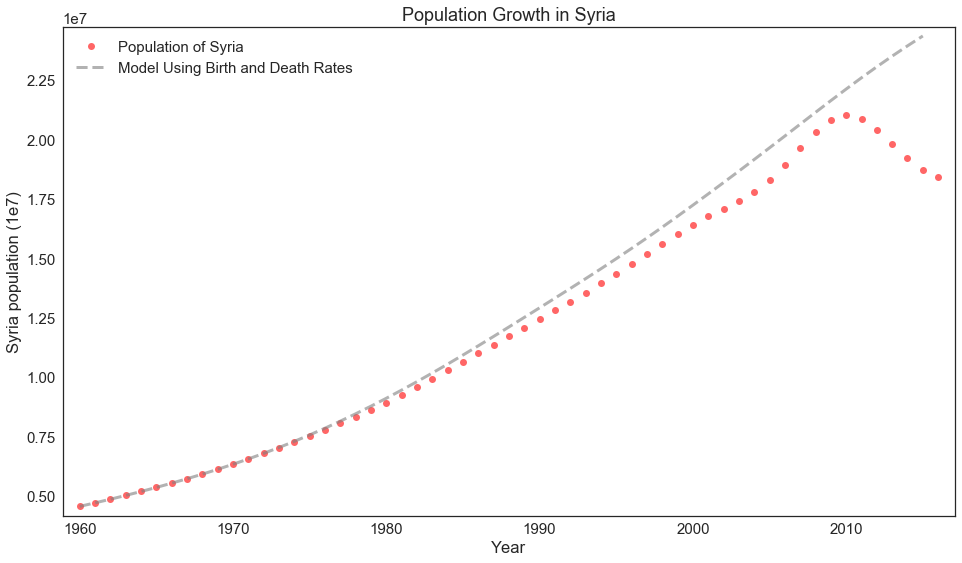

In [12]:
simulation = run_simulation(system)
newfig()
plot(tables, 'ro', label = 'Population of Syria') 
plot(simulation, '--', color='gray', label='Model Using Birth and Death Rates')
decorate(xlabel='Year', ylabel='Syria population (1e7)', title='Population Growth in Syria', )
plt.rcParams["figure.figsize"] = [16,9]
